正文从下一段开始, 这段我打算再从宏观的角度看一下broadcast domain, 即一个LAN(要注意一个LAN里面可以有多个VLAN), 旨在对LAN和ARP, switch, routers有个宏观把握, 建议看完正文再回头看这个: 

In an **Ethernet LAN**, devices use broadcasts and the Address Resolution Protocol (ARP) to locate other devices. ARP sends **Layer 2** broadcasts to a known IPv4 address on the local network to discover the associated MAC address. Devices on **Ethernet LANs** also locate other devices using services. A host typically acquires its IPv4 address configuration using the Dynamic Host Configuration Protocol (DHCP) which sends broadcasts on the local network to locate a DHCP server. (注意和Ethernet LAN和WLAN是并列的, 下面有讲)


**Switches** propagate broadcasts out all interfaces(`fa0/1-fa0/24`) except the interface on which it was received. For example, if a switch in the figure were to receive a broadcast, it would forward it to the other switches and other users connected in the network.

**Routers** do not propagate broadcasts. When a router receives a broadcast, it does not forward it out other interfaces. For instance, when R1 receives a broadcast on its Gigabit Ethernet 0/0 interface, it does not forward out another interface.

> Therefore, each router interface connects to a **broadcast domain** and broadcasts are only propagated within that specific broadcast domain. 所以, 第三层路由器才是连接不同网络的桥梁. 

另外注意, ipv4地址有很多种, 比如broadcast(host部分全是1, FFFF), 网络地址(就是host部分全是0), loopback(127.0.0.1). 其中网络地址和broadcast地址不可以赋给host, 所以这也是为啥一个网段的ip可以分配的主机数需要减2. 

---

# Address Resolution Protocol

首先先搞明白, 互联网是由无数个局域网组成的, 一块拼图是由一个个小拼图🧩块组成的, 没有拼图块哪来的完整的拼图的, 所以了解了局域网, 互联网也就懂的差不多了. 因为互联网不过是多个路由器的相互转发来自不同局域网的数据包(配合着一些route算法动态更新路由表). 

## 局域网 LANs

---

The two most prominent LAN technologies in use today are **Ethernet** and **WLAN (wireless LANs**, 不是WAN, WAN是广域网). Ethernet uses wired communications, including twisted pair, fiber-optic links, and coaxial cables. 我们家中的局域网基本都是WLAN, 你很少见手机插根网线吧. 而一些数据中心, 机房就是那种各种交换机, 服务器的柜子, 一般用的都是ethernet LAN, 柜子里面无数根网线, 密密麻麻. 

说到ethernet cable(网线), 其实网线也有很多不同的种类, 常见的有UTP, STP和Coaxial Cable. 最常见的就是我们用的UTP类型的网线, 看完图和上面说的是不是对Ethernet有了一个具体的认识呢? Ethernet就是有线的局域网用到的(我自己的理解, 可能不对). 

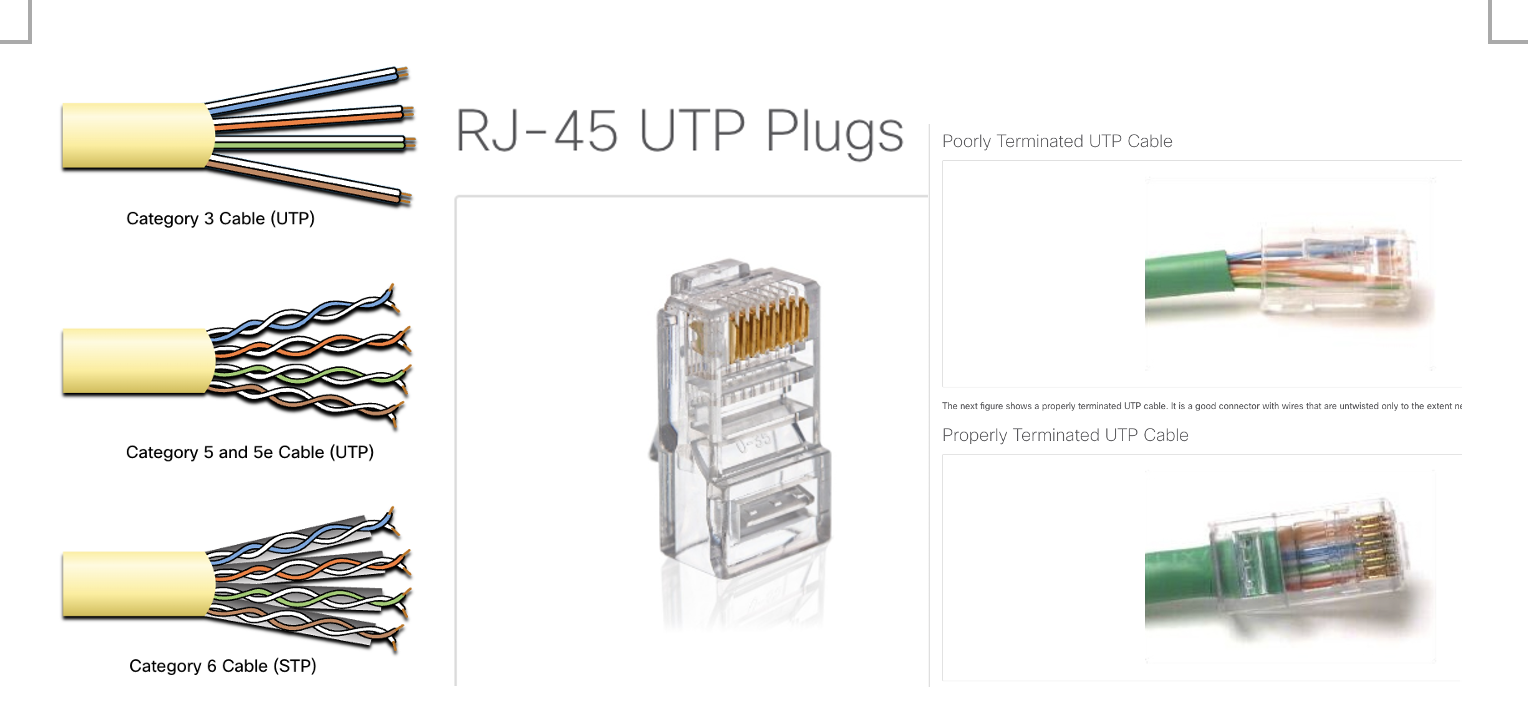

Ethernet operates in the **data link layer** and the **physical layer**. It is a family of networking technologies defined in the IEEE 802.2 and 802.3 standards. 

Recall that **legacy Ethernet** using a **bus topology** or **hubs**, is a shared, half-duplex medium(可以翻译为 淘汰的古老的以前的Ethernet技术使用总线拓扑或者集线器balabala...). Ethernet over a half-duplex medium uses a contention-based access method, carrier sense multiple access/collision detection (CSMA/CD) This ensures that only one device is transmitting at a time. CSMA/CD allows multiple devices to share the same half-duplex medium, detecting a collision when more than one device attempts to transmit simultaneously.

**Ethernet LANs of today** use switches that operate in full-duplex. Full-duplex communications with Ethernet switches **do not** require access control through CSMA/CD.

再扯就远了, 说这是为了对局域网建立一个概念, 并认识到它是网络中最基础的东西. 一个局域网又可以分成多个VLANs, 即逻辑上不同的更小的局域网. 比如一个公司楼里有营销的, 有写代码的, 他们按理说在不同的VLAN更好. 所以VLAN组成局域网, 局域网组成互联网 (其实我们家里的一般就是一个局域网, 这个局域网只含有一个VLAN, 所以我们家里的网络也可以说是一个VLAN). 然后说到这, 就要到重点了, 同一个VLAN里的设备,是通过mac地址相互通信的, 不同VLAN之间(或局域网LAN之间)的设备通信才需要ip地址, 还记得前面第一段说的吗? Ethernet工作在数据链路和物理层, mac地址属于第二层数据链路层. Ethernet是什么来着? 就是我们的有线局域网与之并列的是WLAN 无线局域网. 也就是说局域网就是工作在第一层和第二层的, 这也是为啥交换机通常是第二层的, 而路由器是第三层的, 路由器一般身份为网关(gateway). 只有不同vlan之间的设备通信时, 才会用到网关来作为桥梁, 同一个vlan下的设备只用交换机就可以通信了. 前面说了, 因为交换机工作在第二层, 它是看不到第三层协议的ip地址的, 它看到的只有第二层的mac地址(如果switch收到第三层的package, 它会把这个package的第三层的header拆开, 看里面的第二层的数据). 

那么问题来了, 我们一般就算在局域网内通信, 不也是使用ip地址来指定哪个电脑吗, 没说要指定mac地址啊? 是的, 这是因为有ARP帮你了.

---

现在说一下ARP的定义, 就比较容易理解了

A device uses Address Resolution Protocol (ARP) to determine the destination MAC address of a local device when it knows its IPv4 address.

ARP provides two basic functions:
- Resolving IPv4 addresses to MAC addresses
- Maintaining a table of IPv4 to MAC address mappings

终端设备和交换机又或者是路由器都会维护一个arp table, 就像pcA知道它的默认网关的mac地址, 当pc想和另一个局域网的PCB通信时, 它的数据包第三层的目的ip是PCB的ip, 而目的mac地址, 确实其默认网关的mac地址. 因为pcA和它的网关在同一个局域网, 所以用mac地址通信. 当pcA的数据包发送到其网关后, 网关会查看自己的路由表然后帮PCA把数据包转发到PCB所在的局域网中. 

所以说到现在一共有两个表, 一个是关于arp的, 表里的内容是ip地址和mac地址的map. 另一个是route table, 里面存的是ip地址和子网掩码以及该ip对应的端口(如果是路由器). 

如何查看?

```
// win 系统
arp –a //to display the ARP cache
arp –d //to clear ARP cache

// cisco 路由器和交换机
show ip arp
clear arp-cache
show ip route
clear ip route *

// mac查看路由表
netstat -nr
```

## 下面介绍ARP协议
---

- Every IP device on an Ethernet network has a unique Ethernet MAC address. 好奇全球那么多终端设备怎么做到的? [点击这篇文章告诉你 在第7节](https://zhuanlan.zhihu.com/p/603720907) 

- Ethernet Layer 2 frame, it contains these two addresses: Destination MAC address, Source MAC address

当一个A要和B发送信息时(在同一个局域网), A只知道B的ip地址, A会先看它的arp table, 如果table里没有B的mac地址, 则A会使用ARP协议发送一个广播请求(这个请求的目的mac地址是FFFF), 所以局域网内的所有设备都会收到这个请求(这个请求就像是在问, 谁的ip地址是我发送的这个, 请把你的mac地址返回给我, 然后局域网内不相关设备会忽略这个请求, 只有设备B设备会回复A). 如果B和A在不同局域网, A会直接把数据发送到其默认网关 (A知道它默认网关的mac地址). 

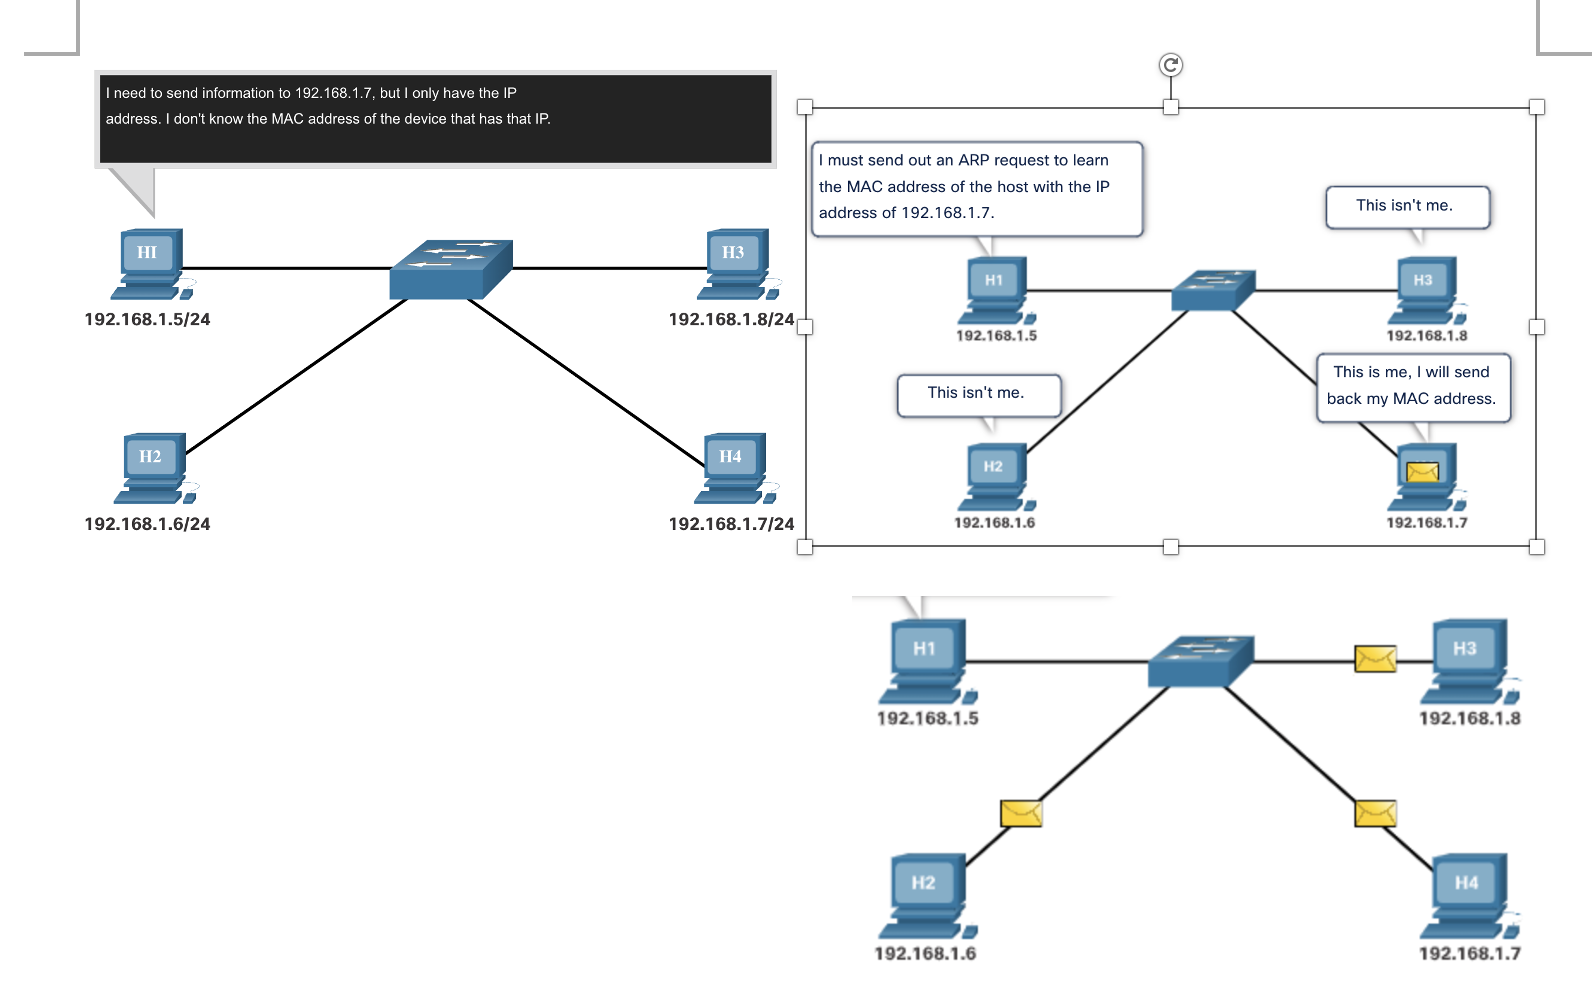

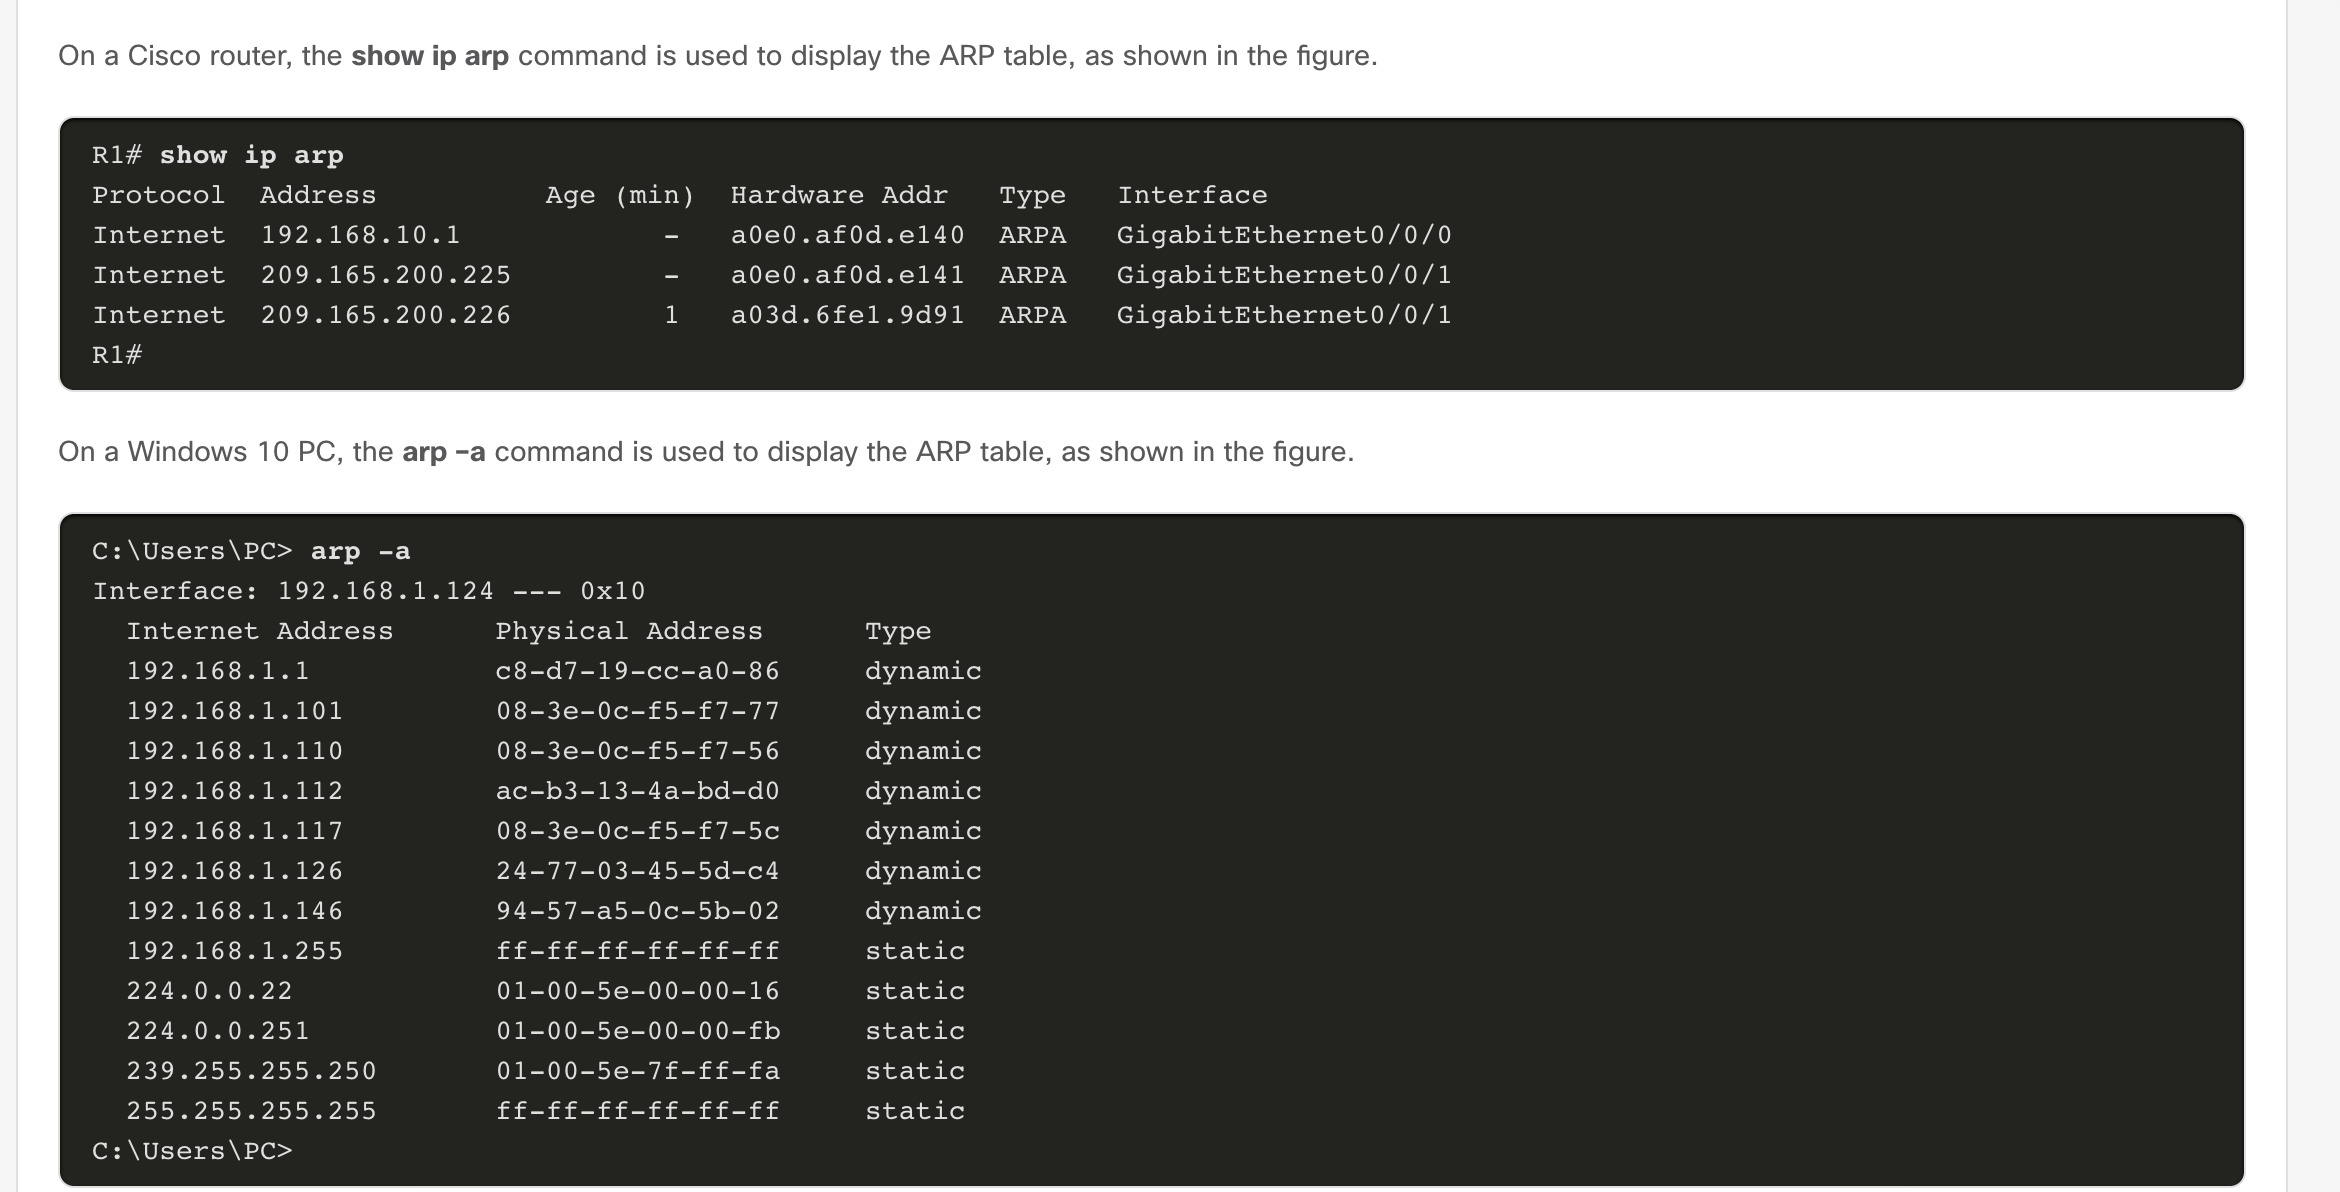